Ankit Daga 

 - John Llano
 

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [69]:
import pandas as pd
import numpy as np
import sklearn as sk

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



In [70]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [71]:
from sklearn.model_selection import train_test_split

np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

reg_df

,x1,x2,x3,x4,x5,y
0,0.441227,-0.330870,2.430771,-0.252092,0.109610,244.349429
1,1.582481,-0.909232,-0.591637,0.187603,-0.329870,-66.739816
2,-1.192765,-0.204877,-0.358829,0.603472,-1.664789,-154.409110
3,-0.700179,1.151391,1.857331,-1.511180,0.644848,194.236600
4,-0.980608,-0.856853,-0.871879,-0.422508,0.996440,-87.092471
...,...,...,...,...,...,...
295,0.423162,-0.988746,0.741750,1.130381,-0.189154,67.307896
296,-2.075862,-0.911934,0.037560,0.697767,-0.506700,-90.781843
297,1.006915,-0.513603,-1.360830,0.438510,-0.675455,-150.392513
298,1.310846,1.089519,-0.400579,-0.621525,0.217709,11.909130


In [86]:
# Your code here. Add cells as needed.
from sklearn.linear_model import LinearRegression

X_columns = column_names

X = reg_df.drop(columns='y')
y = reg_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)


# Make predictions
y_pred_train = model_linreg.predict(X_train)
y_pred_test = model_linreg.predict(X_test)
y_pred = model_linreg.predict(X)


# Assess the model
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_linreg.score(X_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_linreg.score(X_test, y_test)

print(f'model coefficients: {model_linreg.coef_}, {model_linreg.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')

print_model( model_linreg.intercept_, model_linreg.coef_, X_columns, 'model_problem1')

model coefficients: [21.94004497 21.82940408 96.44987404  6.59794014 49.08360659], -6.91620022266283
MSE_test = 116.76, MSE_train = 90.97
R2_test = 0.99, R2_train = 0.99
model_problem1:
 y = -6.92 + 21.94*x1 + 21.83*x2 + 96.45*x3 + 6.60*x4 + 49.08*x5


#### Your written answers here

What are your model parameters?
 - y = -6.92 + 21.94*x1 + 21.83*x2 + 96.45*x3 + 6.60*x4 + 49.08*x5

What were your MSE and R^2?
 - MSE_test = 68.25 and R2_test = 1.00



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [73]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa])
coef = np.append(coef, 0)

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


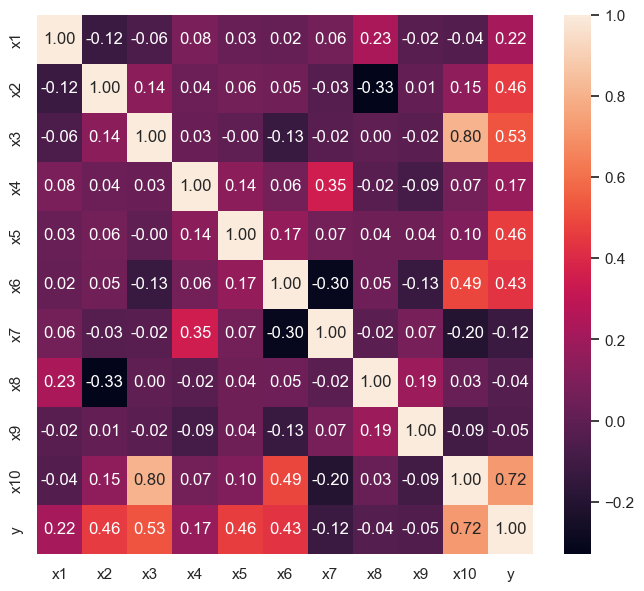

In [ ]:
corr = reg2_df.corr() #corr takes all correlatated numerical values and computes them
plt.subplots(1,1, figsize = (8, 7))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()


In [75]:
from sklearn.linear_model import LinearRegression

candidate_idx = [1,2,4,5,9]

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_names 

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)
model_LR.fit(Z_test, y_test)

# Make predictions
y_pred_train = model_linreg.predict(Z_train)
y_pred_test = model_linreg.predict(Z_test)
y_pred = model_linreg.predict(Z)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)


R2_train = model_LR.score(Z_train, y_train)
R2_test = model_LR.score(Z_test, y_test)



/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
print_model(bias, coef, column_names, model_name = "True Model")
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = "Fit Model")
print(f'R2 value is {R2_test}')
print(f'MSE value is {MSE_test}')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.15 + 57.60*x2 + 67.12*x3 + 58.90*x5 + 42.27*x6 + 57.18*x10
R2 value is 0.8134356899185835
MSE value is 106.00419987998653


#### Your written answers here

What are your model parameters?
 -  y = -15.15 + 57.60*x2 + 67.12*x3 + 58.90*x5 + 42.27*x6 + 57.18*x10

Which features (x1, x2...) were significant? Which were co-linear?
 - x2,x3,x5,x6,x10. x3 and x10 and x6 and x10 are co-linear
 
What were your MSE and R^2?
 - R^2 is 0.8134356899185835 and MSE value is 106.00419987998653. 



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [77]:
housing_df = pd.read_csv('kc_house_data.csv')
#ignore ID, Date, Zipcode
housing_df.columns

housing_df2 = housing_df.drop(columns=['id','date', 'zipcode'])
housing_df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


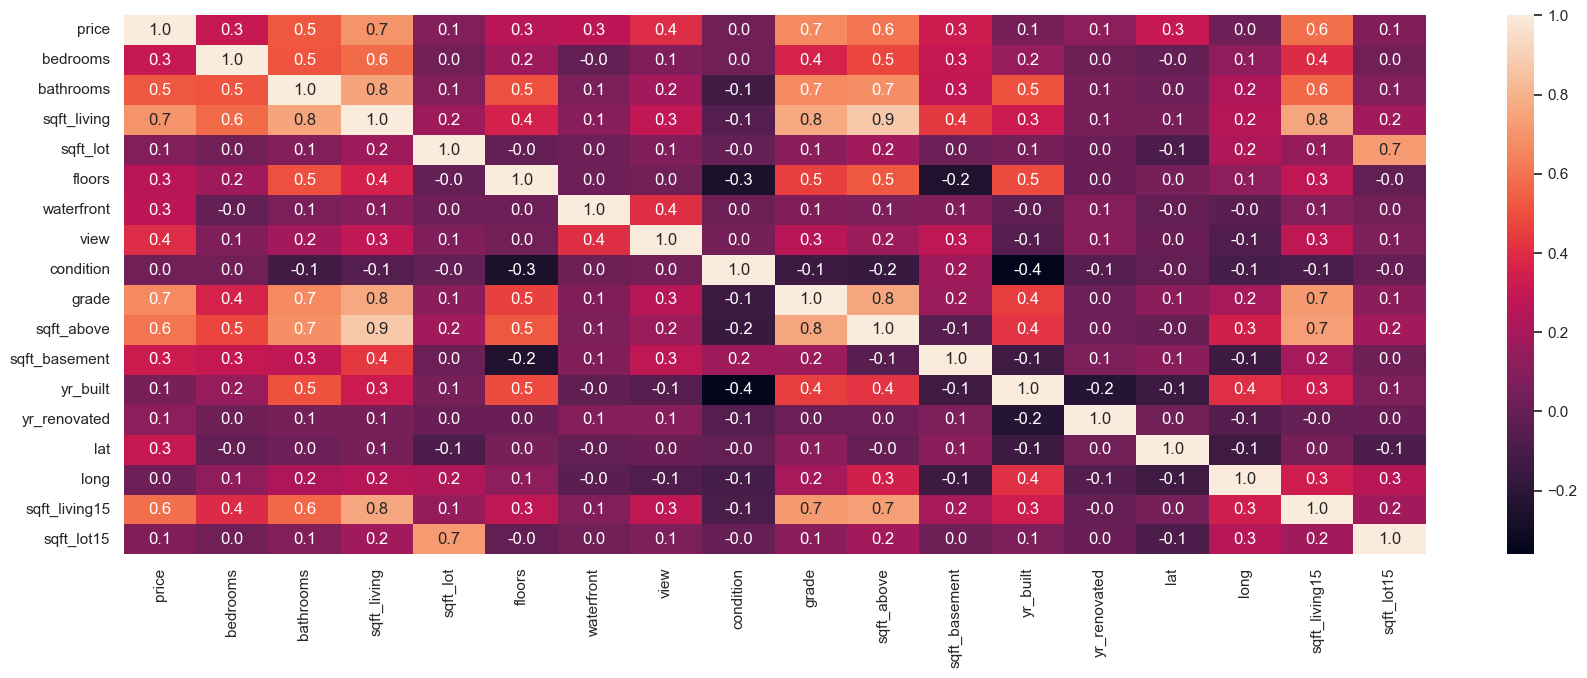

In [78]:
# Your code here. Add cells as needed.


house_corr2 = housing_df2.corr() #corr takes all correlatated numerical values and computes them

sns.heatmap(house_corr2, annot = True, fmt = '.1f')

sns.set_theme(rc={'figure.figsize':(21,7)})

plt.show() 


In [79]:
X = housing_df[['bathrooms', 'sqft_living', 'grade']] #Chose bathroooms, sqft_living and grade because they are highly correlated to each other.
y = housing_df2[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)  
X_scaled_test = ss.transform(X_test)  

model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)


# Make predictions
y_pred_train = model_linreg.predict(X_scaled_train)
y_pred_test = model_linreg.predict(X_scaled_test)
y_pred = model_linreg.predict(X)


# Assess the model
MSE_train = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train = model_linreg.score(X_scaled_train, y_train)

MSE_test = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test = model_linreg.score(X_scaled_test, y_test)

print(f'model coefficients: {model_linreg.coef_}, {model_linreg.intercept_}')
print(f'MSE_test = {MSE_test:.2f}, MSE_train = {MSE_train:.2f}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')



model coefficients: [[-25777.32256599 185319.48553809 118733.76706504]], [541136.64239445]
MSE_test = 61313251892.11, MSE_train = 62667252764.74
R2_test = 0.55, R2_train = 0.53


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


#### Your written answers here
Which features are you using and why?
 
 - Chose bathroooms, sqft_living and grade because they are highly correlated to each other.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [81]:
# Your code here. Add cells as needed.
from sklearn.linear_model import Lasso, Ridge

y = housing_df2['price']
X = housing_df2.drop(columns = ['price'])

#Missing steps for you to fill in
model_lasso = Lasso(alpha = 10000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)  
X_scaled_test = ss.transform(X_test)  



model_lasso.fit(X_scaled_train, y_train)


# Make predictions
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)
y_pred = model_lasso.predict(X)


# Assess the model
MSE_train_lasso = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train_lasso = model_lasso.score(X_scaled_train, y_train)

MSE_test_lasso = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test_lasso = model_lasso.score(X_scaled_test, y_test)

print(f'model coefficients: {model_lasso.coef_}, {model_lasso.intercept_}')
print(f'MSE_test = {MSE_test_lasso:.2f}, MSE_train = {MSE_train_lasso:.2f}')
print(f'R2_test = {R2_test_lasso:.2f}, R2_train = {R2_train_lasso:.2f}')



model coefficients: [ -4652.55697713   8164.83308346 139429.21962104     -0.
      0.          48929.72968826  37891.53572011  10434.76010095
 118331.62018666   9207.72708319      0.         -55601.67301918
   2468.81778743  71767.41052293  -7833.48905765  12068.01624406
     -0.        ], 541115.7146327329
MSE_test = 40153739461.47, MSE_train = 42805932054.77
R2_test = 0.67, R2_train = 0.69


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


### Your written answers here
Which regression did you use?
 - Lasso

Does your regularized model look better than your MLR? How so?
 - Looks better than MLR as the R2 value is higher than MLR. Lasso uses 9 features and MLR uses only 3. 

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [82]:
# Your code here. Add cells as needed.
above1mil = housing_df2[housing_df2['price'] > 1000000]
below1mil = housing_df2[housing_df2['price'] <= 1000000]


below1mil

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.340e+12, tolerance: 4.824e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


model coefficients: [ -21398.64134309   88002.57535065  374772.84069713   11859.91611604
  -85296.57761711  193602.36433983    2030.07547936   25711.22149873
   93676.91930571    4655.52970686  -77207.28777141  -66672.11582157
   22612.66286149   52426.23566797 -172689.71310797   34229.48479795
  -37270.6023345 ], 1531991.3054607545
MSE_test = 164856153204.12, MSE_train = 195329331330.35
R2_test = 0.50, R2_train = 0.53


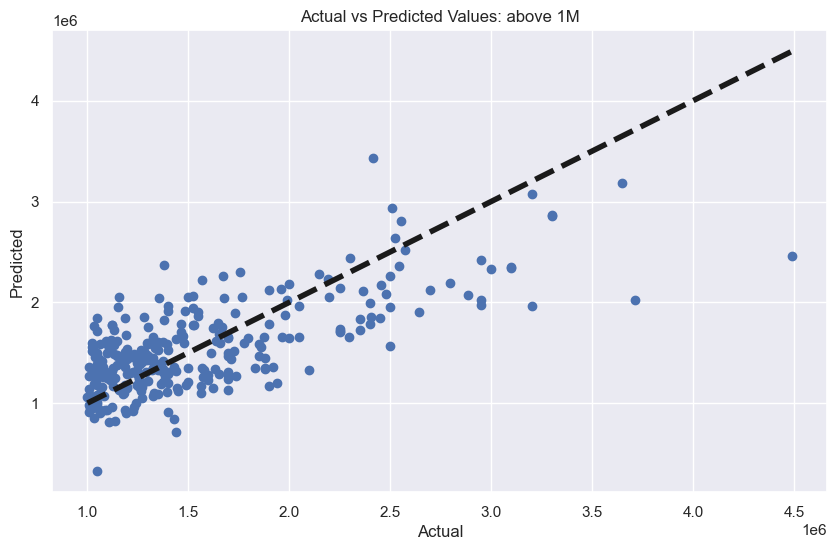

In [83]:
# Above 1 Mil modeling
from sklearn.linear_model import Lasso, Ridge

y = above1mil['price']
X = above1mil.drop(columns = ['price'])

#Missing steps for you to fill in
model_lasso = Lasso(alpha = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)  
X_scaled_test = ss.transform(X_test)  



model_lasso.fit(X_scaled_train, y_train)


# Make predictions
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)
y_pred = model_lasso.predict(X)


# Assess the model
MSE_train_lasso = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train_lasso = model_lasso.score(X_scaled_train, y_train)

MSE_test_lasso = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test_lasso = model_lasso.score(X_scaled_test, y_test)

print(f'model coefficients: {model_lasso.coef_}, {model_lasso.intercept_}')
print(f'MSE_test = {MSE_test_lasso:.2f}, MSE_train = {MSE_train_lasso:.2f}')
print(f'R2_test = {R2_test_lasso:.2f}, R2_train = {R2_train_lasso:.2f}')


# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values: above 1M')
plt.show()


model coefficients: [-7.08516161e+03  1.76579943e+04  9.97133546e+04  1.05682571e+04
  1.66309470e+04  6.68539817e+03  1.65285581e+04  1.72983922e+04
  7.05254729e+04 -4.73211915e+04 -2.78507481e+04 -5.03058911e+04
  3.78563739e+03  7.35827090e+04  4.43581956e+01  3.03885397e+04
 -4.42787759e+03], 468545.9341729746
MSE_test = 11678568789.63, MSE_train = 12131421439.41
R2_test = 0.69, R2_train = 0.69


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.671e+12, tolerance: 6.232e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


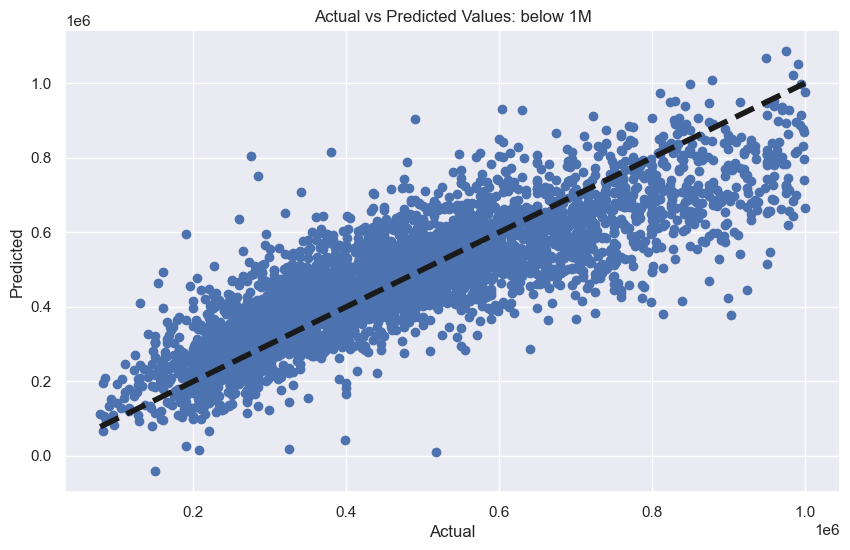

In [84]:
# Below 1 Mil modeling
from sklearn.linear_model import Lasso, Ridge

y = below1mil['price']
X = below1mil.drop(columns = ['price'])

#Missing steps for you to fill in
model_lasso = Lasso(alpha = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
ss.fit(X_train)

X_scaled_train = ss.transform(X_train)  
X_scaled_test = ss.transform(X_test)  




model_lasso.fit(X_scaled_train, y_train)


# Make predictions
y_pred_train = model_lasso.predict(X_scaled_train)
y_pred_test = model_lasso.predict(X_scaled_test)
y_pred = model_lasso.predict(X)


# Assess the model
MSE_train_lasso = sk.metrics.mean_squared_error(y_train, y_pred_train)
R2_train_lasso = model_lasso.score(X_scaled_train, y_train)

MSE_test_lasso = sk.metrics.mean_squared_error(y_test, y_pred_test)
R2_test_lasso = model_lasso.score(X_scaled_test, y_test)

print(f'model coefficients: {model_lasso.coef_}, {model_lasso.intercept_}')
print(f'MSE_test = {MSE_test_lasso:.2f}, MSE_train = {MSE_train_lasso:.2f}')
print(f'R2_test = {R2_test_lasso:.2f}, R2_train = {R2_train_lasso:.2f}')




# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values: below 1M')
plt.show()



 ### Your written answers here

 What are the $R^2$ for the two models?

  - Above 1M R^2: 0.50
  - Below 1M R^2: 0.69
 
